- What features/columns had a relatively even or normal distribution? Which features/columns did not?

From the columns I did bar charts of, none of them seemed to have a relatively normal distribution except for Engine Size which looked the most like a normal distribution, but if I were to give a definite answer, I would not say it is normal. All of the rest had either positive or negative distribution.

- How did you handle missing values? Why did you do this method as opposed to others?

I simply deleted the missing values as there was not a sure fire way to make an accurate prediction to what the NA values could have been.

- How did you encode your categorical data? Why did you do this method as opposed to others?

"Car Make and Model" was the only column I needed to use one hot encoding for because there should not be an inherent order for these. I combined the Car Make and Car Model columns for this to work. I used label encoding for a couple different columns that needed correct encoding and a set order for it to work.

- How did you handle removing outliers? Why did you use this method as opposed to others?

I used the IQR method because it felt the most logical to me. While the topic of cars and their stats is interesting to me, I know next to nothing about how all of them work, which is what led me to believe IQR would be the best method to use.

- How did you normalize/standardize the data? Why did you use this method as opposed to others?

Normalization was used, when looking at bar graphs I made they did not have a normal bellcurve so normalization was determined to be the method I should use.

- How did each model perform? Which performed the best?

Linear Regression:
      Training performed poorly for all three evaluation metrics
    - Testing performed poorly for all three evaluation metrics

Support Vector Machine: 
      Training performed poorly for all three evaluation metrics
    - Testing performed poorly for all three evaluation metrics

Decision Tree:
      Training performed exceptionally well for all three evaluation metrics
    - Testing performed exceptionally well for all three evaluation metrics

Neural Network:
      Training performed poorly for all three evaluation metrics
    - Testing performed poorly for all three evaluation metrics

- Did any models seem to have a relatively high amount of bias (underfitting)? Variance (overfitting)?

There were no models that had a relatively high amount of variance, because there were no cases where the training set was good and the testing set was bad. However, the linear regression, support vector machine and neural network all performed poorly during the training phase, making them have a relatively high amount of bias. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
rawDF = pd.read_csv("Sport car price.csv")

rawDF.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3.0,379,331,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3.0,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4.0,710,568,2.7,298000


In [3]:
rawDF.describe()

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,956.000000,948.000000,956.000000,956.000000,956.000000,9.560000e+02
mean,2021.183054,4.395781,609.728033,525.486402,3.576077,3.508078e+05
std,2.067187,1.398801,390.792551,294.149865,0.733028,7.018476e+05
min,1965.000000,0.000000,181.000000,151.000000,1.800000,2.500000e+04
25%,2021.000000,3.500000,454.000000,399.500000,3.000000,7.097500e+04
50%,2021.000000,4.000000,591.000000,505.000000,3.500000,1.300000e+05
75%,2022.000000,5.200000,660.000000,590.000000,4.000000,2.427750e+05
max,2023.000000,8.400000,10000.000000,7376.000000,6.500000,5.200000e+06


In [4]:
rawDF.info

<bound method DataFrame.info of          Car Make Car Model  Year  Engine Size (L)  Horsepower  \
0         Porsche       911  2022              3.0         379   
1     Lamborghini   Huracan  2021              5.2         630   
2         Ferrari   488 GTB  2022              3.9         661   
3            Audi        R8  2022              5.2         562   
4         McLaren      720S  2021              4.0         710   
..            ...       ...   ...              ...         ...   
951  Aston Martin   Vantage  2021              4.0         503   
952       Bugatti    Chiron  2021              8.0        1479   
953    Koenigsegg     Jesko  2022              5.0        1280   
954       McLaren     Senna  2021              4.0         789   
955        Pagani    Huayra  2021              6.0         764   

     Torque (lb-ft)  0-60 MPH Time (seconds)  Price (in USD)  
0               331                      4.0          101200  
1               443                      2.8     

In [5]:
rawDF.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            8
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [6]:
filteredDF = rawDF.dropna(subset=["Engine Size (L)", "Torque (lb-ft)"])

In [7]:
filteredDF

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3.0,379,331,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3.0,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4.0,710,568,2.7,298000
...,...,...,...,...,...,...,...,...
951,Aston Martin,Vantage,2021,4.0,503,505,3.6,146000
952,Bugatti,Chiron,2021,8.0,1479,1180,2.4,3000000
953,Koenigsegg,Jesko,2022,5.0,1280,1106,2.5,3000000
954,McLaren,Senna,2021,4.0,789,590,2.7,1000000


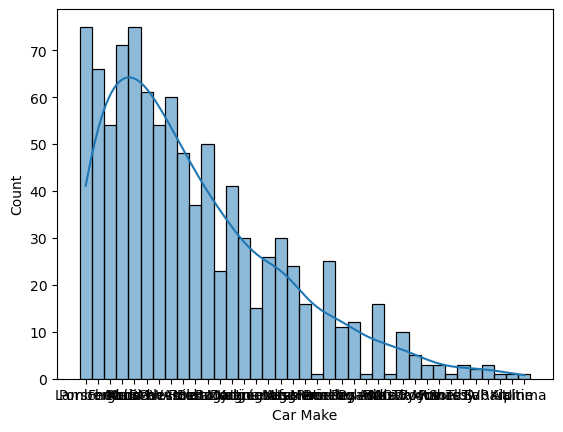

In [8]:
sns.histplot(rawDF["Car Make"], bins=30, kde=True)
plt.show()

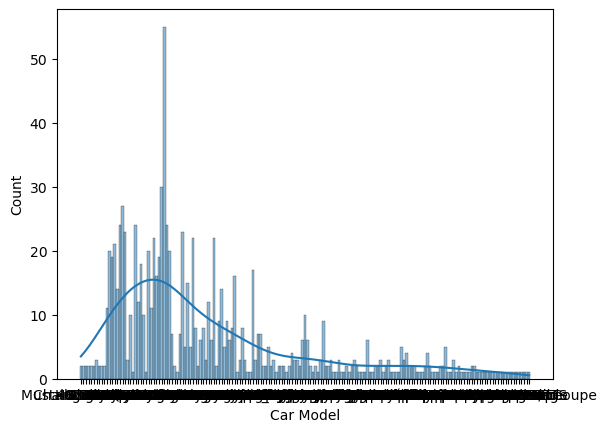

In [9]:
sns.histplot(rawDF["Car Model"], bins=30, kde=True)
plt.show()

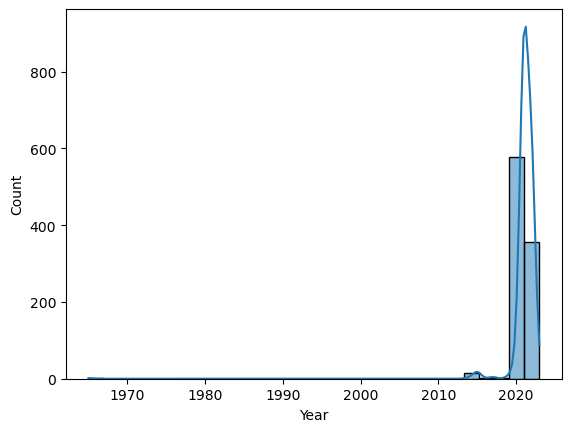

In [10]:
sns.histplot(rawDF["Year"], bins=30, kde=True)
plt.show()

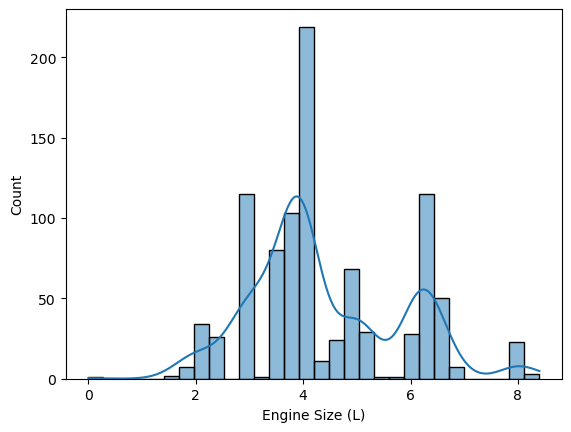

In [11]:
sns.histplot(rawDF["Engine Size (L)"], bins=30, kde=True)
plt.show()

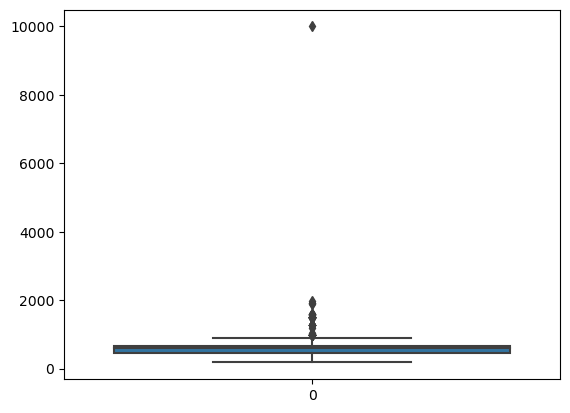

In [12]:
sns.boxplot(rawDF["Horsepower"])
plt.show()

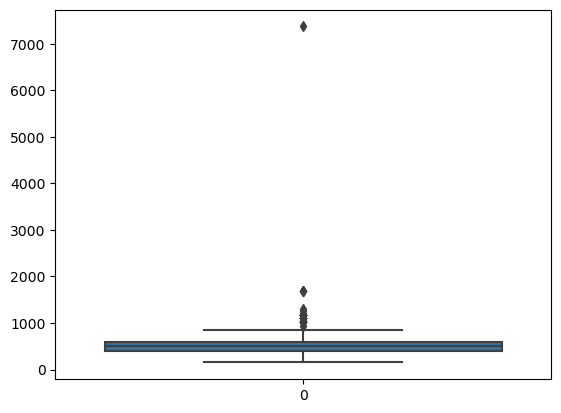

In [13]:
sns.boxplot(rawDF["Torque (lb-ft)"])
plt.show()

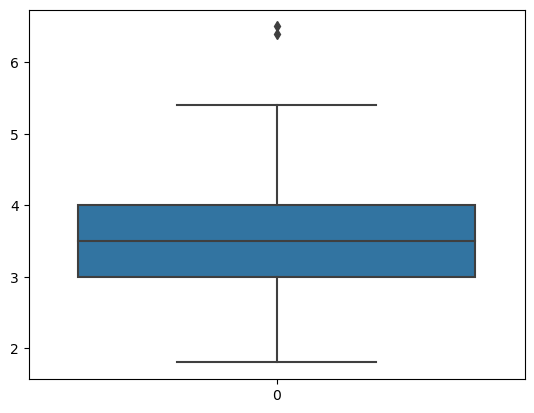

In [14]:
sns.boxplot(rawDF["0-60 MPH Time (seconds)"])
plt.show()

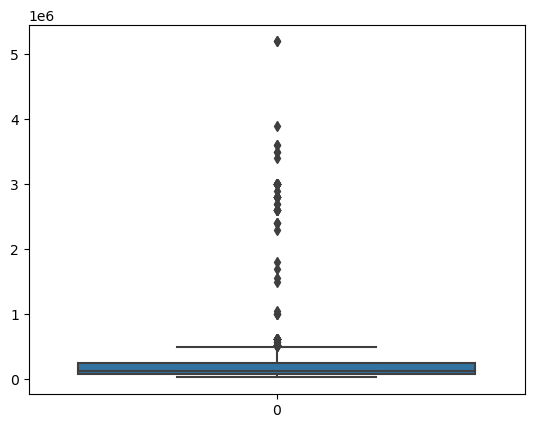

In [15]:
sns.boxplot(rawDF["Price (in USD)"])
plt.show()

In [16]:
def getLabelList(n):
    labelList = []
    for i in range(n):
        labelList.append(i)
    return labelList

In [17]:
encodedDF = filteredDF

In [18]:
yearList = ["1964", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

In [19]:
encodedDF["Year"] = encodedDF["Year"].astype(str)

C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\3755927402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encodedDF["Year"] = encodedDF["Year"].astype(str)


In [20]:
encodedDF["Year"] = encodedDF["Year"].replace(yearList, getLabelList(len(yearList)))

C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\1465282250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encodedDF["Year"] = encodedDF["Year"].replace(yearList, getLabelList(len(yearList)))


In [21]:
encodedDF

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,9,3.0,379,331,4.0,101200
1,Lamborghini,Huracan,8,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,9,3.9,661,561,3.0,333750
3,Audi,R8,9,5.2,562,406,3.2,142700
4,McLaren,720S,8,4.0,710,568,2.7,298000
...,...,...,...,...,...,...,...,...
951,Aston Martin,Vantage,8,4.0,503,505,3.6,146000
952,Bugatti,Chiron,8,8.0,1479,1180,2.4,3000000
953,Koenigsegg,Jesko,9,5.0,1280,1106,2.5,3000000
954,McLaren,Senna,8,4.0,789,590,2.7,1000000


In [22]:
encoder = OneHotEncoder(sparse=False)

carMake2D = encodedDF["Car Make"].values.reshape(-1, 1)

encodedData = encoder.fit_transform(carMake2D)

categories = encoder.categories_

oneHotCarMake = categories

oneHotCarMake

c:\Users\cjroo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Acura', 'Alfa Romeo', 'Alpine', 'Ariel', 'Aston Martin', 'Audi',
        'BMW', 'Bentley', 'Bugatti', 'Chevrolet', 'Dodge', 'Ferrari',
        'Ford', 'Jaguar', 'Kia', 'Koenigsegg', 'Lamborghini', 'Lexus',
        'Lotus', 'Maserati', 'Mazda', 'McLaren', 'Mercedes-AMG',
        'Mercedes-Benz', 'Nissan', 'Pagani', 'Polestar', 'Porsche',
        'Rolls-Royce', 'Shelby', 'Subaru', 'TVR', 'Tesla', 'Toyota',
        'Ultima', 'W Motors'], dtype=object)]

In [23]:
encoder = OneHotEncoder(sparse=False)

carModel2D = encodedDF["Car Model"].values.reshape(-1, 1)

encodedData = encoder.fit_transform(carModel2D)

categories = encoder.categories_

oneHotCarModel = categories

oneHotCarModel

c:\Users\cjroo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['1', '370Z', '370Z Coupe', '370Z Nismo', '400Z', '488 GTB', '4C',
        '4C Spider', '570S', '570S Spider', '600LT', '600LT Spider',
        '718 Boxster', '718 Cayman', '718 Cayman GT4', '720S', '765LT',
        '812 Superfast', '911', '911 Turbo S', '918 Spyder', 'A110',
        'AMG A45', 'AMG C 63', 'AMG C 63 S', 'AMG C43 Coupe', 'AMG C63',
        'AMG GT', 'AMG GT 4-Door Coupe', 'AMG GT 63 S',
        'AMG GT Black Series', 'AMG GT R', 'Artura', 'Atom', 'Aventador',
        'Aventador S', 'Aventador SVJ', 'Boxster', 'C 63 AMG', 'C 63 S',
        'C 63 S Coupe', 'C63 AMG', 'C63 S', 'C63 S AMG', 'C63 S Coupe',
        'CLS63 AMG', 'Camaro', 'Camaro SS', 'Camaro SS 1LE',
        'Camaro SS Convertible', 'Camaro ZL1', 'Cayman', 'Cayman GT4',
        'Challenger', 'Challenger Hellcat', 'Challenger Hellcat Redeye',
        'Challenger R/T', 'Challenger SRT Hellcat',
        'Challenger SRT Hellcat Redeye', 'Charger', 'Charger Hellcat',
        'Charger SRT Hellcat', 'Chiron',

In [24]:
filteredDF["Car Model and Make"] = filteredDF["Car Make"] + " " + filteredDF["Car Model"]

C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\660682726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredDF["Car Model and Make"] = filteredDF["Car Make"] + " " + filteredDF["Car Model"]


In [25]:
filteredDF

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Car Model and Make
0,Porsche,911,9,3.0,379,331,4.0,101200,Porsche 911
1,Lamborghini,Huracan,8,5.2,630,443,2.8,274390,Lamborghini Huracan
2,Ferrari,488 GTB,9,3.9,661,561,3.0,333750,Ferrari 488 GTB
3,Audi,R8,9,5.2,562,406,3.2,142700,Audi R8
4,McLaren,720S,8,4.0,710,568,2.7,298000,McLaren 720S
...,...,...,...,...,...,...,...,...,...
951,Aston Martin,Vantage,8,4.0,503,505,3.6,146000,Aston Martin Vantage
952,Bugatti,Chiron,8,8.0,1479,1180,2.4,3000000,Bugatti Chiron
953,Koenigsegg,Jesko,9,5.0,1280,1106,2.5,3000000,Koenigsegg Jesko
954,McLaren,Senna,8,4.0,789,590,2.7,1000000,McLaren Senna


In [26]:
droppedColumnDF = filteredDF

droppedColumnDF

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Car Model and Make
0,Porsche,911,9,3.0,379,331,4.0,101200,Porsche 911
1,Lamborghini,Huracan,8,5.2,630,443,2.8,274390,Lamborghini Huracan
2,Ferrari,488 GTB,9,3.9,661,561,3.0,333750,Ferrari 488 GTB
3,Audi,R8,9,5.2,562,406,3.2,142700,Audi R8
4,McLaren,720S,8,4.0,710,568,2.7,298000,McLaren 720S
...,...,...,...,...,...,...,...,...,...
951,Aston Martin,Vantage,8,4.0,503,505,3.6,146000,Aston Martin Vantage
952,Bugatti,Chiron,8,8.0,1479,1180,2.4,3000000,Bugatti Chiron
953,Koenigsegg,Jesko,9,5.0,1280,1106,2.5,3000000,Koenigsegg Jesko
954,McLaren,Senna,8,4.0,789,590,2.7,1000000,McLaren Senna


In [27]:
droppedColumnDF.drop(columns=["Car Make", "Car Model"], inplace=True)

C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\3022451657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droppedColumnDF.drop(columns=["Car Make", "Car Model"], inplace=True)


In [28]:
droppedColumnDF

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Car Model and Make
0,9,3.0,379,331,4.0,101200,Porsche 911
1,8,5.2,630,443,2.8,274390,Lamborghini Huracan
2,9,3.9,661,561,3.0,333750,Ferrari 488 GTB
3,9,5.2,562,406,3.2,142700,Audi R8
4,8,4.0,710,568,2.7,298000,McLaren 720S
...,...,...,...,...,...,...,...
951,8,4.0,503,505,3.6,146000,Aston Martin Vantage
952,8,8.0,1479,1180,2.4,3000000,Bugatti Chiron
953,9,5.0,1280,1106,2.5,3000000,Koenigsegg Jesko
954,8,4.0,789,590,2.7,1000000,McLaren Senna


In [29]:
encoder = OneHotEncoder(sparse=False)

encodedData = encoder.fit_transform(encodedDF[["Car Model and Make"]])

encoder.categories_

c:\Users\cjroo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Acura NSX', 'Alfa Romeo 4C', 'Alfa Romeo 4C Spider',
        'Alfa Romeo Giulia Quadrifoglio', 'Alpine A110', 'Ariel Atom',
        'Aston Martin DB11', 'Aston Martin DBS Superleggera',
        'Aston Martin Vantage', 'Audi R8', 'Audi R8 Spyder', 'Audi RS 3',
        'Audi RS 5', 'Audi RS 5 Coupe', 'Audi RS 6', 'Audi RS 6 Avant',
        'Audi RS 7', 'Audi RS 7 Sportback', 'Audi RS3', 'Audi RS5',
        'Audi RS5 Coupe', 'Audi RS6', 'Audi RS6 Avant', 'Audi RS7',
        'Audi RS7 Sportback', 'Audi S5', 'Audi TT RS', 'Audi TT RS Coupe',
        'BMW M2', 'BMW M2 CS', 'BMW M2 Competition', 'BMW M4',
        'BMW M4 Competition', 'BMW M4 Coupe', 'BMW M5',
        'BMW M5 Competition', 'BMW M8', 'BMW Z4 M40i', 'BMW Z4 Roadster',
        'BMW i8', 'Bentley Continental GT', 'Bentley Continental GT Speed',
        'Bugatti Chiron', 'Bugatti Chiron Pur Sport',
        'Bugatti Chiron Super Sport 300+', 'Chevrolet Camaro',
        'Chevrolet Camaro SS', 'Chevrolet Camaro SS 1LE',
    

In [30]:
oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)

oneHotDF

,Acura NSX,Alfa Romeo 4C,Alfa Romeo 4C Spider,Alfa Romeo Giulia Quadrifoglio,Alpine A110,Ariel Atom,Aston Martin DB11,Aston Martin DBS Superleggera,Aston Martin Vantage,Audi R8,...,Shelby Cobra,Subaru WRX STI,TVR Griffith,Tesla Roadster,Toyota GR Supra,Toyota Supra,Ultima RS,W Motors Fenyr SuperSport,W Motors Fenyr Supersport,W Motors Lykan Hypersport
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
encodedDF = pd.concat([droppedColumnDF, oneHotDF], axis=1).drop(columns = "Car Model and Make")

encodedDF.head(948)

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),"(Acura NSX,)","(Alfa Romeo 4C,)","(Alfa Romeo 4C Spider,)","(Alfa Romeo Giulia Quadrifoglio,)",...,"(Shelby Cobra,)","(Subaru WRX STI,)","(TVR Griffith,)","(Tesla Roadster,)","(Toyota GR Supra,)","(Toyota Supra,)","(Ultima RS,)","(W Motors Fenyr SuperSport,)","(W Motors Fenyr Supersport,)","(W Motors Lykan Hypersport,)"
0,9,3.0,379.0,331.0,4.0,101200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,5.2,630.0,443.0,2.8,274390.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,3.9,661.0,561.0,3.0,333750.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,5.2,562.0,406.0,3.2,142700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,4.0,710.0,568.0,2.7,298000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,8,4.0,503.0,505.0,3.6,146000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952,8,8.0,1479.0,1180.0,2.4,3000000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,9,5.0,1280.0,1106.0,2.5,3000000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,8,4.0,789.0,590.0,2.7,1000000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


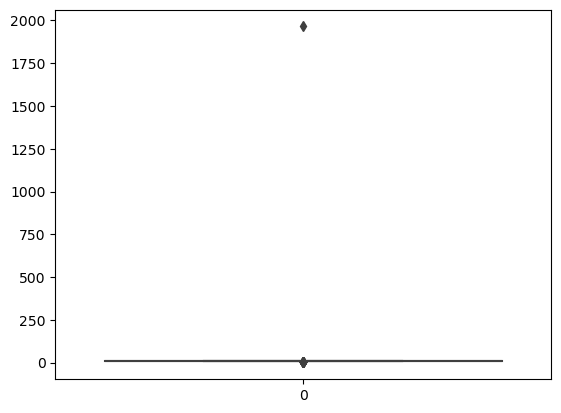

In [32]:
sns.boxplot(droppedColumnDF["Year"])
plt.show()

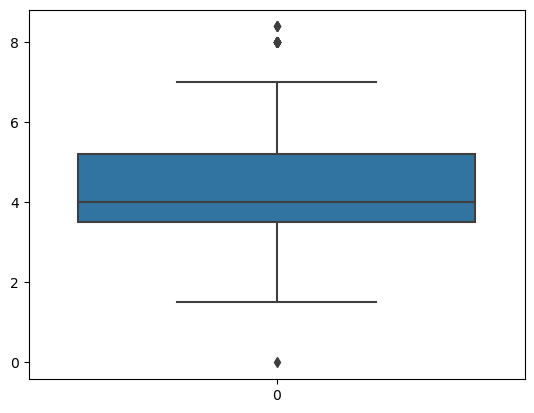

In [33]:
sns.boxplot(droppedColumnDF["Engine Size (L)"])
plt.show()

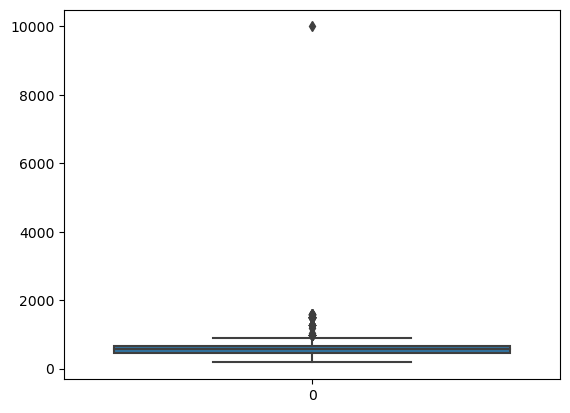

In [34]:
sns.boxplot(droppedColumnDF["Horsepower"])
plt.show()

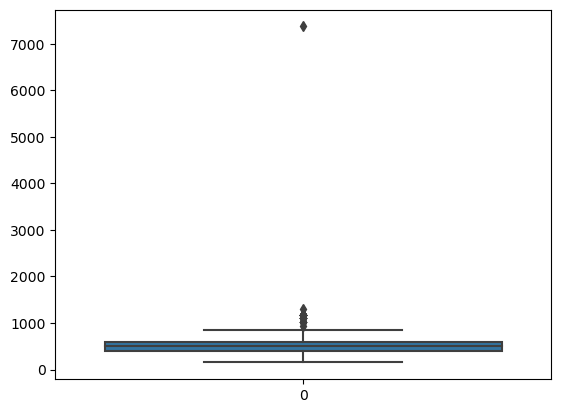

In [35]:
sns.boxplot(droppedColumnDF["Torque (lb-ft)"])
plt.show()

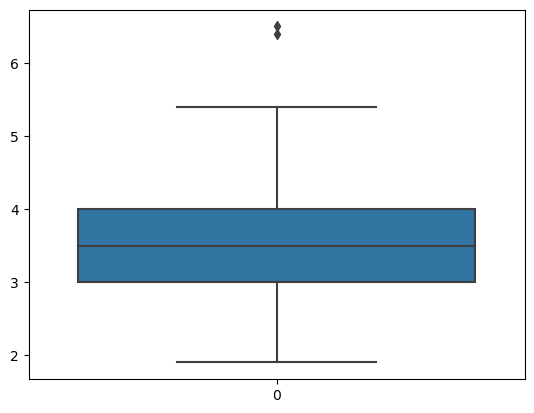

In [36]:
sns.boxplot(droppedColumnDF["0-60 MPH Time (seconds)"])
plt.show()

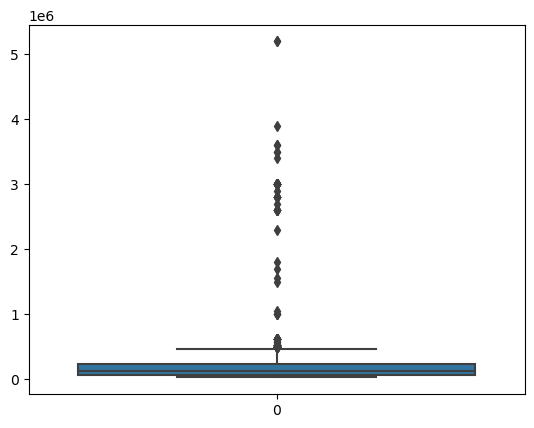

In [37]:
sns.boxplot(droppedColumnDF["Price (in USD)"])
plt.show()

In [38]:
droppedColumnDF["Year"] = pd.to_numeric(droppedColumnDF["Year"], errors='coerce')

C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\3529093020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droppedColumnDF["Year"] = pd.to_numeric(droppedColumnDF["Year"], errors='coerce')


C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\117628251.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(droppedColumnDF["Engine Size (L)"], 25, interpolation='midpoint')
C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\117628251.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(droppedColumnDF["Engine Size (L)"], 75, interpolation='midpoint')


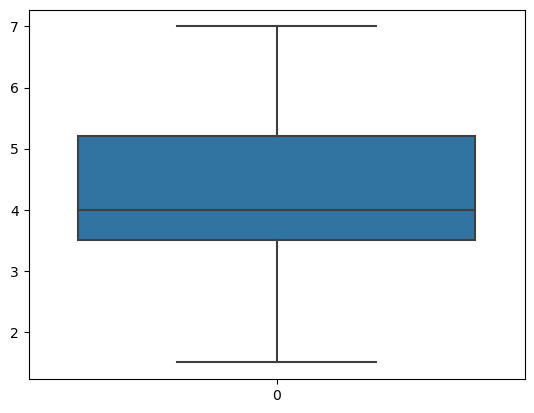

In [39]:
# IQR for Year

import numpy as np

Q1 = np.percentile(droppedColumnDF["Engine Size (L)"], 25, interpolation='midpoint')
Q3 = np.percentile(droppedColumnDF["Engine Size (L)"], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR

maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = droppedColumnDF[droppedColumnDF["Engine Size (L)"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Engine Size (L)"] > minThreshold]

iqrDF

sns.boxplot(iqrDF["Engine Size (L)"])
plt.show()

In [40]:
print(iqrDF.shape)

(921, 7)


C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\1747812601.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(droppedColumnDF["Engine Size (L)"], 25, interpolation='midpoint')
C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\1747812601.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(droppedColumnDF["Engine Size (L)"], 75, interpolation='midpoint')


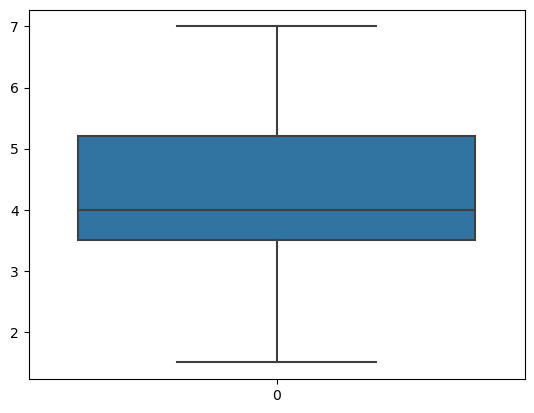

In [41]:
# IQR for Engine Size

import numpy as np

Q1 = np.percentile(droppedColumnDF["Engine Size (L)"], 25, interpolation='midpoint')
Q3 = np.percentile(droppedColumnDF["Engine Size (L)"], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR

maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = droppedColumnDF[droppedColumnDF["Engine Size (L)"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Engine Size (L)"] > minThreshold]

iqrDF

sns.boxplot(iqrDF["Engine Size (L)"])
plt.show()

In [42]:
print(iqrDF.shape)

(921, 7)


C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\1072433719.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(droppedColumnDF["Horsepower"], 25, interpolation='midpoint')
C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\1072433719.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(droppedColumnDF["Horsepower"], 75, interpolation='midpoint')


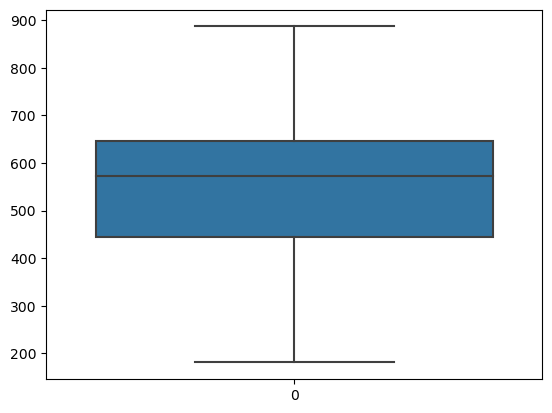

In [43]:
# IQR for Horsepower

import numpy as np

Q1 = np.percentile(droppedColumnDF["Horsepower"], 25, interpolation='midpoint')
Q3 = np.percentile(droppedColumnDF["Horsepower"], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR

maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = droppedColumnDF[droppedColumnDF["Horsepower"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Horsepower"] > minThreshold]

iqrDF

sns.boxplot(iqrDF["Horsepower"])
plt.show()

In [44]:
print(iqrDF.shape)

(885, 7)


C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\1344618233.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(droppedColumnDF["Torque (lb-ft)"], 25, interpolation='midpoint')
C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\1344618233.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(droppedColumnDF["Torque (lb-ft)"], 75, interpolation='midpoint')


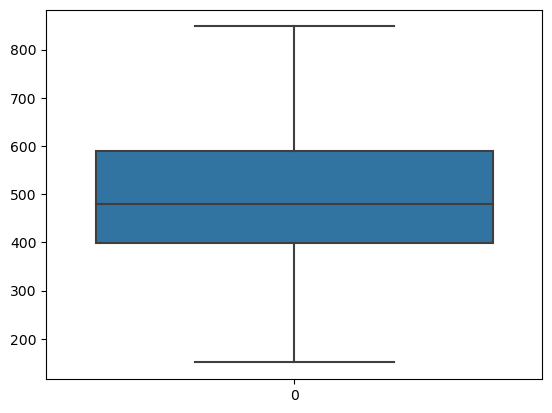

In [45]:
# IQR for Torque 

import numpy as np

Q1 = np.percentile(droppedColumnDF["Torque (lb-ft)"], 25, interpolation='midpoint')
Q3 = np.percentile(droppedColumnDF["Torque (lb-ft)"], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR

maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = droppedColumnDF[droppedColumnDF["Torque (lb-ft)"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Torque (lb-ft)"] > minThreshold]

iqrDF

sns.boxplot(iqrDF["Torque (lb-ft)"])
plt.show()

In [46]:
print(iqrDF.shape)

(907, 7)


C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\662667808.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(droppedColumnDF["0-60 MPH Time (seconds)"], 25, interpolation='midpoint')
C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\662667808.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(droppedColumnDF["0-60 MPH Time (seconds)"], 75, interpolation='midpoint')


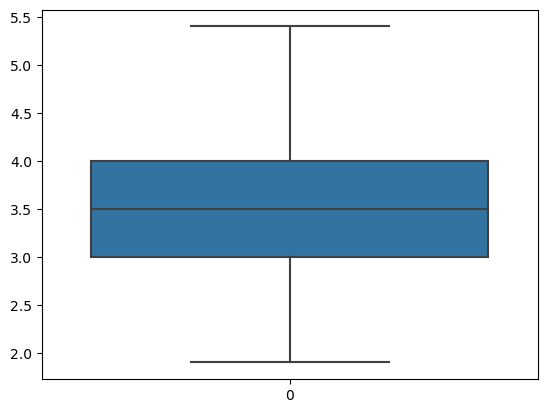

In [47]:
# IQR for MPH Time

import numpy as np

Q1 = np.percentile(droppedColumnDF["0-60 MPH Time (seconds)"], 25, interpolation='midpoint')
Q3 = np.percentile(droppedColumnDF["0-60 MPH Time (seconds)"], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR

maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = droppedColumnDF[droppedColumnDF["0-60 MPH Time (seconds)"] < maxThreshold]
iqrDF = iqrDF[iqrDF["0-60 MPH Time (seconds)"] > minThreshold]

iqrDF

sns.boxplot(iqrDF["0-60 MPH Time (seconds)"])
plt.show()

In [48]:
print(iqrDF.shape)

(946, 7)


C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\3821065149.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(droppedColumnDF["Price (in USD)"], 25, interpolation='midpoint')
C:\Users\cjroo\AppData\Local\Temp\ipykernel_20228\3821065149.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(droppedColumnDF["Price (in USD)"], 75, interpolation='midpoint')


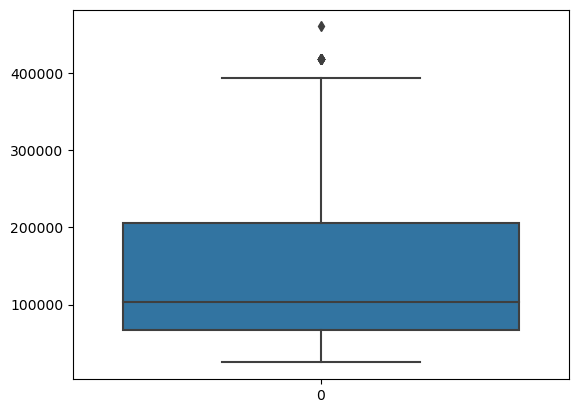

In [49]:
# IQR for Price

import numpy as np

Q1 = np.percentile(droppedColumnDF["Price (in USD)"], 25, interpolation='midpoint')
Q3 = np.percentile(droppedColumnDF["Price (in USD)"], 75, interpolation='midpoint')
IQR = Q3 - Q1

IQR

maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = droppedColumnDF[droppedColumnDF["Price (in USD)"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Price (in USD)"] > minThreshold]

iqrDF

sns.boxplot(iqrDF["Price (in USD)"])
plt.show()

In [50]:
print(iqrDF.shape)

(814, 7)


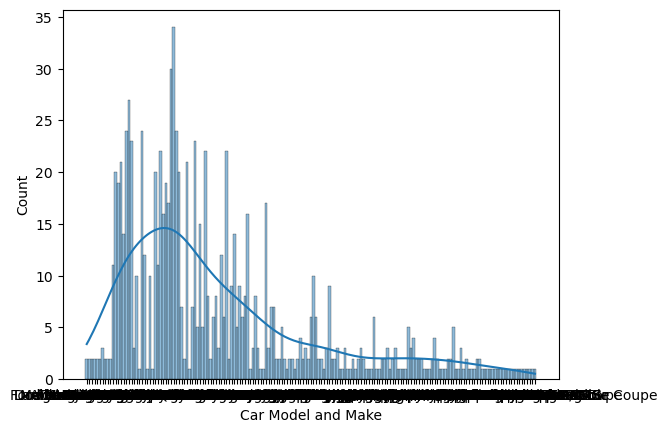

In [51]:
sns.histplot(droppedColumnDF["Car Model and Make"], bins=30, kde=True)
plt.show()

In [52]:
encodedDF.head()

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),"(Acura NSX,)","(Alfa Romeo 4C,)","(Alfa Romeo 4C Spider,)","(Alfa Romeo Giulia Quadrifoglio,)",...,"(Shelby Cobra,)","(Subaru WRX STI,)","(TVR Griffith,)","(Tesla Roadster,)","(Toyota GR Supra,)","(Toyota Supra,)","(Ultima RS,)","(W Motors Fenyr SuperSport,)","(W Motors Fenyr Supersport,)","(W Motors Lykan Hypersport,)"
0,9,3.0,379.0,331.0,4.0,101200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,5.2,630.0,443.0,2.8,274390.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,3.9,661.0,561.0,3.0,333750.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,5.2,562.0,406.0,3.2,142700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,4.0,710.0,568.0,2.7,298000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalizedDF = iqrDF

normalizedDF[["Year", "Engine Size (L)", "Horsepower", "Torque (lb-ft)", "0-60 MPH Time (seconds)", "Price (in USD)"]] = scaler.fit_transform(iqrDF[["Year", "Engine Size (L)", "Horsepower", "Torque (lb-ft)", "0-60 MPH Time (seconds)", "Price (in USD)"]])

normalizedDF

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Car Model and Make
0,0.888889,0.357143,0.020165,0.024913,0.456522,0.175073,Porsche 911
1,0.777778,0.619048,0.045728,0.040415,0.195652,0.572985,Lamborghini Huracan
2,0.888889,0.464286,0.048885,0.056747,0.239130,0.709367,Ferrari 488 GTB
3,0.888889,0.619048,0.038802,0.035294,0.282609,0.270421,Audi R8
4,0.777778,0.476190,0.053875,0.057716,0.173913,0.627230,McLaren 720S
...,...,...,...,...,...,...,...
947,0.777778,0.750000,0.044913,0.043875,0.369565,0.527287,Mercedes-Benz SLS AMG
948,0.777778,0.738095,0.027905,0.042076,0.456522,0.000000,Chevrolet Camaro
949,0.777778,0.273810,0.013138,0.027543,0.739130,0.005066,Ford Mustang
950,0.777778,0.440476,0.015378,0.016471,0.695652,0.011695,Nissan 370Z


In [54]:
xDF = normalizedDF.drop(columns=["Price (in USD)"])

xDF

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Car Model and Make
0,0.888889,0.357143,0.020165,0.024913,0.456522,Porsche 911
1,0.777778,0.619048,0.045728,0.040415,0.195652,Lamborghini Huracan
2,0.888889,0.464286,0.048885,0.056747,0.239130,Ferrari 488 GTB
3,0.888889,0.619048,0.038802,0.035294,0.282609,Audi R8
4,0.777778,0.476190,0.053875,0.057716,0.173913,McLaren 720S
...,...,...,...,...,...,...
947,0.777778,0.750000,0.044913,0.043875,0.369565,Mercedes-Benz SLS AMG
948,0.777778,0.738095,0.027905,0.042076,0.456522,Chevrolet Camaro
949,0.777778,0.273810,0.013138,0.027543,0.739130,Ford Mustang
950,0.777778,0.440476,0.015378,0.016471,0.695652,Nissan 370Z


In [55]:
xDF.drop(columns=["Car Model and Make"], inplace=True)

In [56]:
yDF = pd.DataFrame(normalizedDF["Price (in USD)"])

yDF

,Price (in USD)
0,0.175073
1,0.572985
2,0.709367
3,0.270421
4,0.627230
...,...
947,0.527287
948,0.000000
949,0.005066
950,0.011695


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF, 
                                                test_size=0.30)

model = LinearRegression().fit(xTrain, yTrain)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTest)
print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared = False))

0.42086646460989974
0.12657167558929294
0.1615597807725943


In [60]:
model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTrain)
print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared = False))

0.4077838567798262
0.12866869920439247
0.16319800059646702


In [61]:
from sklearn import svm
model = svm.SVR().fit(xTrain, yTrain)
preds = model.predict(xTest)
print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared = False))

0.47936882391823843
0.10855047787266281
0.15318244018936633


c:\Users\cjroo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
model = svm.SVR().fit(xTrain, yTrain)
preds = model.predict(xTrain)
print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared = False))

0.48106882923624616
0.11018594796137172
0.1527670147536313


c:\Users\cjroo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
from sklearn import tree
model = tree.DecisionTreeRegressor().fit(xTrain, yTrain)
preds = model.predict(xTest)
print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared = False))

0.9623617721840906
0.017415733038906873
0.0411868408419473


In [65]:
model = tree.DecisionTreeRegressor().fit(xTrain, yTrain)
preds = model.predict(xTrain)
print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared = False))

0.9972567795116754
0.004647293035386372
0.011107212245207118


In [66]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor().fit(xTrain, yTrain)
preds = model.predict(xTest)
print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared = False))

0.3632105987409644
0.12733655183400297
0.16941108010977055


c:\Users\cjroo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
model = MLPRegressor().fit(xTrain, yTrain)
preds = model.predict(xTrain)
print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared = False))

0.377646038866258
0.12953995144281563
0.16729903732661414


c:\Users\cjroo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
